In [26]:
import os
import onnxruntime

from onnxruntime.quantization.preprocess import quant_pre_process as preprocess

In [22]:
#Path to hrnet model
model_path = os.path.join("models","hrnet_pose","hrnet_pose.onnx")
output_model = os.path.join("models","hrnet_pose","hrnet_pose_infer.onnx")
model_path

'models\\hrnet_pose\\hrnet_pose.onnx'

In [29]:
help(onnxruntime.quantization.preprocess)

Help on module onnxruntime.quantization.preprocess in onnxruntime.quantization:

NAME
    onnxruntime.quantization.preprocess

DESCRIPTION
    # --------------------------------------------------------------------------
    # Copyright (c) Microsoft, Intel Corporation. All rights reserved.
    # Licensed under the MIT License. See License.txt in the project root for
    # license information.
    # --------------------------------------------------------------------------

FUNCTIONS
    parse_arguments()

DATA
    logger = <Logger onnxruntime.quantization.preprocess (WARNING)>

FILE
    c:\users\dfs\desktop\projects\env_onnx\lib\site-packages\onnxruntime\quantization\preprocess.py




In [21]:
help(preprocess)

Help on function quant_pre_process in module onnxruntime.quantization.shape_inference:

quant_pre_process(input_model: Union[str, pathlib.Path, onnx.onnx_ml_pb2.ModelProto, NoneType] = None, output_model_path: Union[str, pathlib.Path, NoneType] = None, skip_optimization: bool = False, skip_onnx_shape: bool = False, skip_symbolic_shape: bool = False, auto_merge: bool = False, int_max: int = 2147483647, guess_output_rank: bool = False, verbose: int = 0, save_as_external_data: bool = False, all_tensors_to_one_file: bool = False, external_data_location: Optional[str] = None, external_data_size_threshold: int = 1024, **deprecated_kwargs) -> None
    Shape inference and model optimization, in preparation for quantization.
    
    Args:
        input_model: Path to the input model file or ModelProto
        output_model_path: Path to the output model file
        skip_optimization: Skip model optimization step if true. This may result in ONNX shape
            inference failure for some mode

# What does preprocessing model do?!?!
## https://onnxruntime.ai/docs/performance/model-optimizations/quantization.html
### TLDR: Prepares the model for quantization by rewriting computation graph, eliminating redundancies, etc as well as performing shape inferencing

In [24]:
preprocessed_model = preprocess(input_model=model_path, output_model_path=output_model)
preprocessed_model

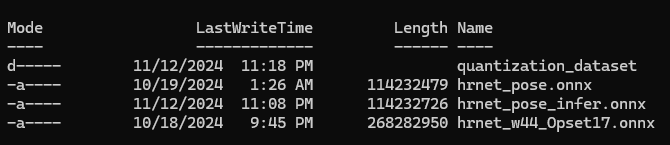

### Next steps
1. Download sample calibration dataset with people in different poses and save to directory quantization_dataset. (use webscraping tool previously developed)
2. Develop DataReader using CalibrationDataReader module that will iterate through directory above and perform calibration (ex. https://github.com/microsoft/onnxruntime-inference-examples/blob/main/quantization/notebooks/imagenet_v2/mobilenet.ipynb , 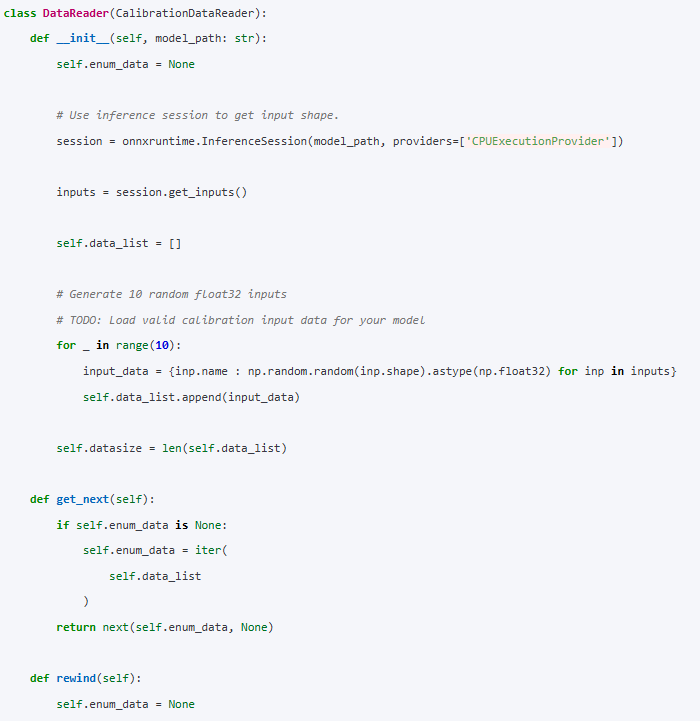 , https://onnxruntime.ai/docs/execution-providers/QNN-ExecutionProvider.html)
3. Use static quantization (quantize_static) to quantize model to uint8 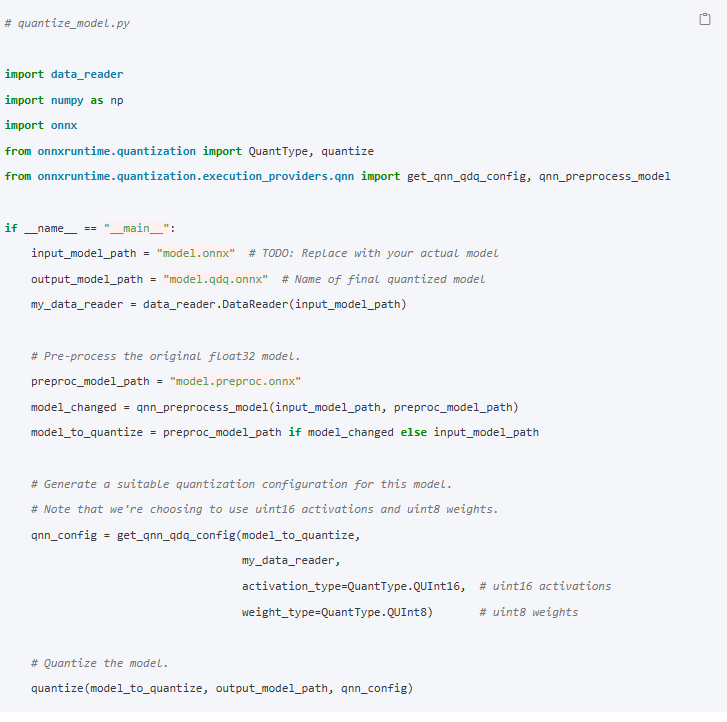

## Do we need to use qnn_preprocess_model as in image 2 or quant_pre_process as in image 1?</br></br>Seems like key thing is to setup calibration dataset and then the DataReader, you can experiment from there to see what format shows activity on NPU